In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## import data

In [9]:
# Jonathan Powell University of Central FL 
# https://www.jonathanmpowell.com/coup-detat-dataset.html

country_yr = pd.read_csv('powell_thyne_ccode_year.txt', sep="\t")

final = pd.read_csv('powell_thyne_coups_final.txt', sep="\t")

In [10]:
final.head()

,country,ccode,year,month,day,coup,version
0,Cuba,40,1952,3,10,2,V2020.10.13
1,Cuba,40,1957,9,5,1,V2020.10.13
2,Haiti,41,1950,5,10,2,V2020.10.13
3,Haiti,41,1956,12,12,2,V2020.10.13
4,Haiti,41,1957,4,2,2,V2020.10.13


In [18]:
ctry_gp = final.groupby(['country', 'year', 'coup']).size().reset_index()
ctry_gp.rename(columns={0:'count'}, inplace=True)

ctry_p = ctry_gp.pivot(index=['country', 'year'], columns='coup', values='count').reset_index()
ctry_p.rename(columns={1:'attempt', 2:'success'}, inplace=True)

ctry_p.head()

coup,country,year,attempt,success
0,Afghanistan,1973,NaN,1.0
1,Afghanistan,1978,NaN,1.0
2,Afghanistan,1990,1.0,NaN
3,Afghanistan,1992,NaN,1.0
4,Algeria,1964,1.0,NaN


In [23]:
# year_gp = ctry_p.groupby(['year']).agg({'attempt':'sum', 'success':'sum'}).reset_index()
# year_gp.head()

yr_gp = final.groupby(['year', 'coup']).size().reset_index()
yr_gp.rename(columns={0:'count'}, inplace=True)

yr_gp['coup_result'] = 'attempt'
yr_gp.loc[yr_gp.coup == 2, 'coup_result'] = 'success'
yr_gp.head()

,year,coup,count,coup_result
0,1950,1,1,attempt
1,1950,2,1,success
2,1951,1,2,attempt
3,1951,2,4,success
4,1952,1,2,attempt


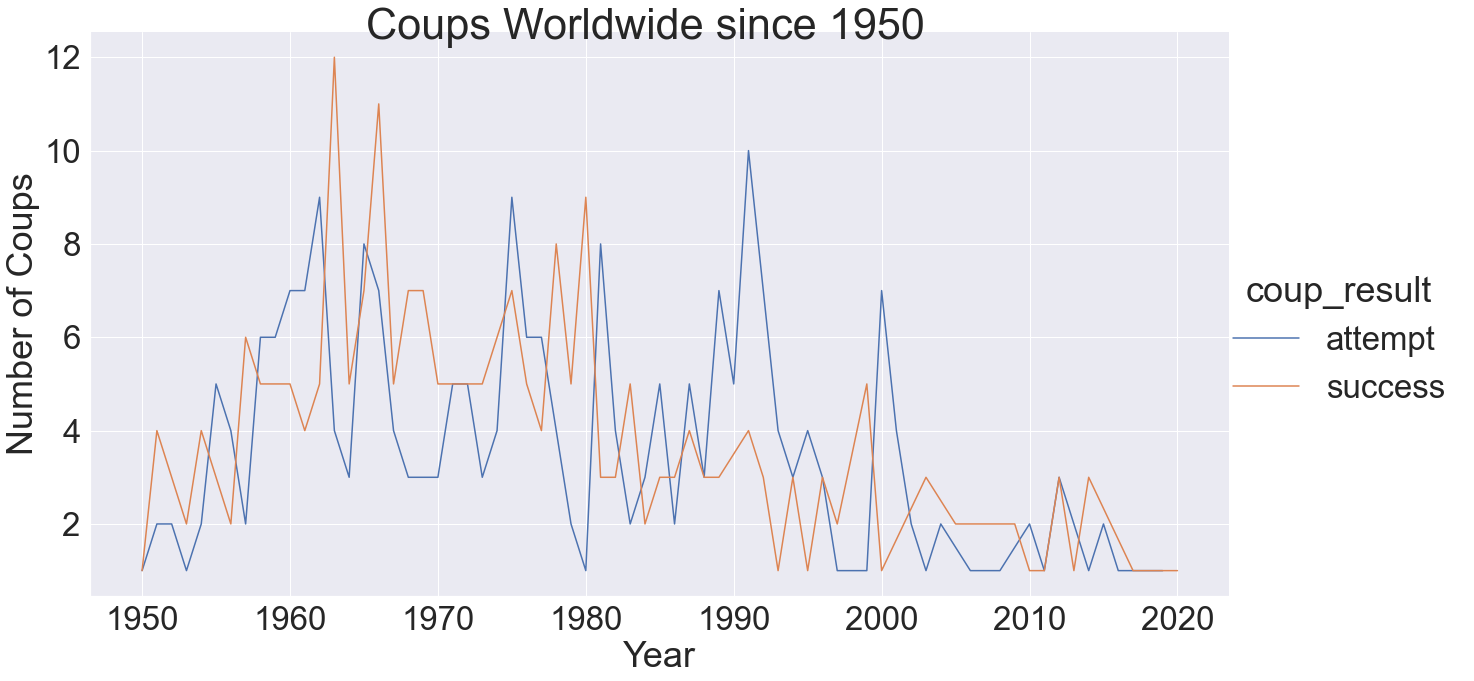

In [38]:
make plot
sns.set(font_scale=3)
g = sns.FacetGrid(yr_gp, 
                  hue='coup_result', height=10, legend_out=True) 
g = (g.map(sns.lineplot, "year", "count"))
g.fig.set_size_inches(20,10)
# g.set_xticklabels(rotation=30)
g.set_axis_labels('Year', 'Number of Coups')
g.fig.suptitle('Coups Worldwide since 1950')
g.add_legend()

In [75]:
df = final[final.year > 3].groupby(['year'])['coup'].sum().reset_index()
df.head()

row = [2021, 4]
df.loc[len(df)] = row

df

,year,coup
0,1950,3
1,1951,10
2,1952,8
3,1953,5
4,1954,10
...,...,...
65,2016,1
66,2017,2
67,2019,3
68,2020,2


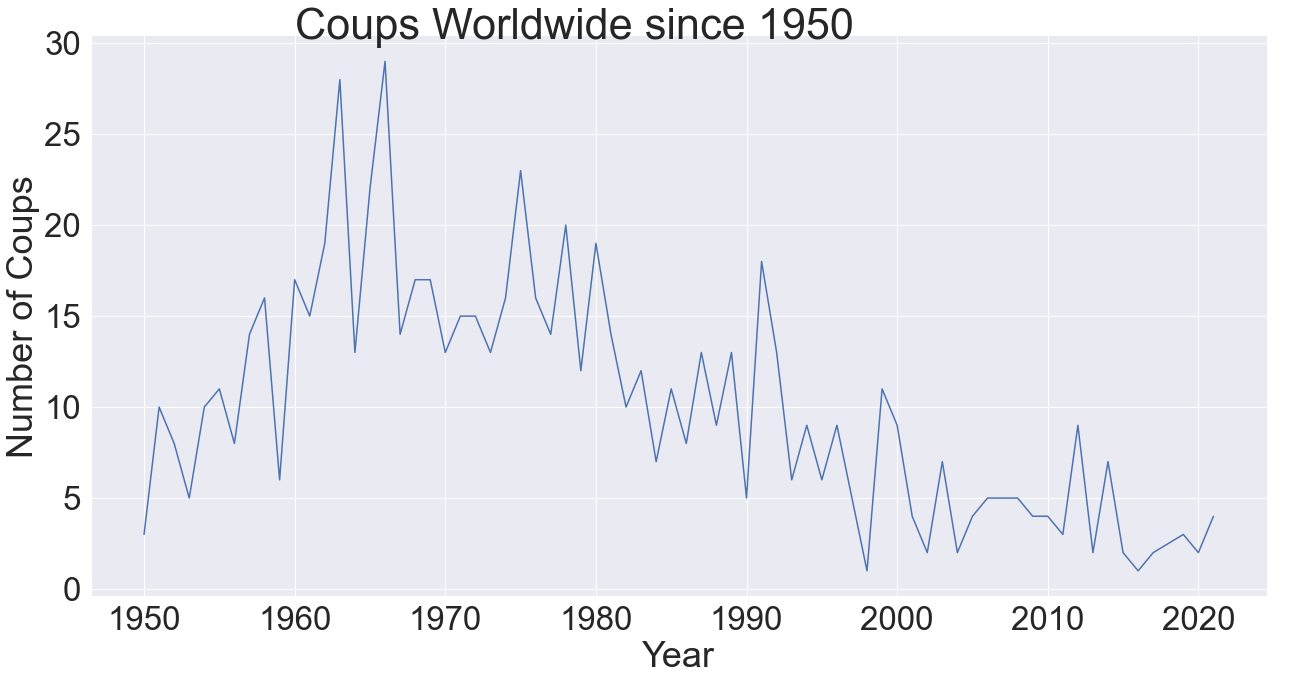

In [76]:
# sns.barplot(df, x='year', y='coup')

# make plot
sns.set(font_scale=3)
g = sns.FacetGrid(df, height=10, legend_out=True) 
g = (g.map(sns.lineplot, "year", "coup"))
g.fig.set_size_inches(20,10)
# g.set_xticklabels(rotation=30)
g.set_axis_labels('Year', 'Number of Coups')
g.fig.suptitle('Coups Worldwide since 1950')
g.add_legend()